In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
# Cải thiện thuật toán phân cụm K_means tính ma trận khoảng cách distance từ các điểm đến tâm các cụm dựa vào cơ chế broadcasting của numpy
class K_means:
  def __init__(self,K,max_iter):
    self.K = K # Định nghĩa số cụm cần phân chia dữ liệu
    self.max_iter = max_iter # Số vòng lặp tối đa
  def fit(self,X):
    self.X = X # Dữ liệu cần phân cụm
    self.new_centroids = self.X[np.random.choice(self.X.shape[0],self.K,replace=False)] # Chọn K_tâm cụm ngẫu nhiên từ bộ dữ liệu
    self.old_centroids = np.zeros(self.new_centroids.shape)
    matrix_distance = None
    matrix_clusterings = None
    while not np.allclose(self.new_centroids,self.old_centroids) and self.max_iter>0:
      '''
      X chứa tất cả các dòng mỗi dòng là 1 ma trận có kích thước (1,số thuộc tính)
      '''
      matrix_distance = np.sqrt(((X[:,np.newaxis,:] - self.new_centroids)**2).sum(axis=2)) # Thực hiện cơ chế broadcasting
      matrix_clusterings = np.argmin(matrix_distance,axis=1)
      self.old_centroids = self.new_centroids.copy()
      for i in range(self.K):
        self.new_centroids[i] = np.mean(self.X[matrix_clusterings == i],axis=0)
      self.max_iter-=1
    self.Label = matrix_clusterings

    # within cluster sum of square
    self.WCSS = np.sum([(np.linalg.norm(self.X[self.Label == i]-self.new_centroids[i],axis=1)**2).sum(axis=0) for i in range(self.K)])

In [181]:
FILE_PATH = '/content/drive/MyDrive/AIO 2024/Module_3/Week 2/T6/Data/iris_2D.csv'

In [182]:
# Đọc dữ liệu file csv
df = pd.read_csv(FILE_PATH)
df

,Petal_Length,Petal_Width,Label
0,1.4,0.2,0.0
1,1.3,0.4,0.0
2,1.4,0.3,0.0
3,4.0,1.0,1.0
4,4.7,1.4,1.0
5,3.6,1.3,1.0


In [183]:
X = df.iloc[:,:-1]
X

,Petal_Length,Petal_Width
0,1.4,0.2
1,1.3,0.4
2,1.4,0.3
3,4.0,1.0
4,4.7,1.4
5,3.6,1.3


In [184]:
X = X.to_numpy()
X

array([[1.4, 0.2],
       [1.3, 0.4],
       [1.4, 0.3],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3]])

In [185]:
# Khởi tạo tham số cho mô hình
K = 2 # Số cụm cần phân cho bộ dữ liệu
max_iter = 100 # Số vòng lặp tối đa

In [186]:
# Sử dụng thuật toán K_mean ở trên để tiến hành phân cụm dữ liệu
K_mean = K_means(K,max_iter)

In [187]:
# Phân cụm dữ liệu
K_mean.fit(X)

In [188]:
K_mean.Label

array([0, 0, 0, 1, 1, 1])

In [192]:
K_mean.WCSS

np.float64(0.7333333333333334)

In [199]:
# Sử dụng chỉ số WCSS để tìm K tốt nhất
wcss = []
for K in range(1,X.shape[0]+1):
  k_mean_clustering = K_means(K,max_iter)
  k_mean_clustering.fit(X)
  wcss.append(k_mean_clustering.WCSS)

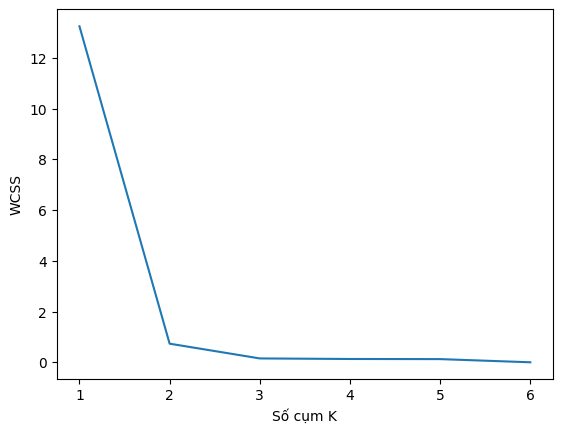

In [200]:
k = np.arange(1,X.shape[0]+1)
plt.xlabel('Số cụm K')
plt.ylabel('WCSS')
plt.plot(k,wcss)

# Using function built-in of sklearn

In [237]:
from sklearn.cluster import KMeans

In [243]:
K_means = KMeans(n_clusters=2,max_iter=100)

In [244]:
# Huấn luyện mô hình
K_means.fit(X)

KMeans(max_iter=100, n_clusters=2)

In [245]:
# Phân cụm dữ liệu
K_means.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [249]:
# Lấy ra chỉ số đánh giá WCSS
K_means.inertia_

0.7333333333333335

In [253]:
# Lấy ra tâm cụm
K_means.cluster_centers_

array([[4.1       , 1.23333333],
       [1.36666667, 0.3       ]])